In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import t
import math

In [65]:
df = pd.read_csv(r"temperature.csv")

In [20]:
df.head()

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,309.100000,NaN,NaN,NaN
1,2012-10-01 13:00:00,284.630000,282.080000,289.480000,281.800000,291.870000,291.530000,293.410000,296.600000,285.120000,...,285.630000,288.220000,285.830000,287.170000,307.590000,305.470000,310.580000,304.4,304.4,303.5
2,2012-10-01 14:00:00,284.629041,282.083252,289.474993,281.797217,291.868186,291.533501,293.403141,296.608509,285.154558,...,285.663208,288.247676,285.834650,287.186092,307.590000,304.310000,310.495769,304.4,304.4,303.5
3,2012-10-01 15:00:00,284.626998,282.091866,289.460618,281.789833,291.862844,291.543355,293.392177,296.631487,285.233952,...,285.756824,288.326940,285.847790,287.231672,307.391513,304.281841,310.411538,304.4,304.4,303.5
4,2012-10-01 16:00:00,284.624955,282.100481,289.446243,281.782449,291.857503,291.553209,293.381213,296.654466,285.313345,...,285.850440,288.406203,285.860929,287.277251,307.145200,304.238015,310.327308,304.4,304.4,303.5


In [5]:
df.shape

(45253, 37)

C:\Users\bishw\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\bishw\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 1.0, 'Temperature Histogram for San Diego')

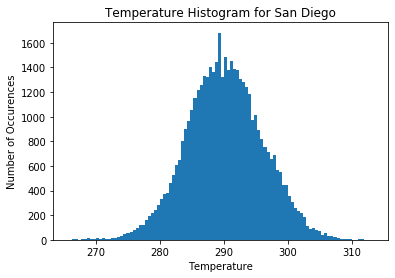

In [8]:
plt.hist(df['San Diego'], bins = 100)
plt.xlabel('Temperature')
plt.ylabel('Number of Occurences')
plt.title('Temperature Histogram for San Diego')

In [41]:
u = df['San Diego'].mean()
print('population mean = ', u)

population mean =  290.21504416532485


In [70]:
s2p = np.var(df['San Diego'])
print('population variance =',s2)

population variance = 34.69124106330662


In [22]:
f13 = (df['datetime']>= '2013-02-01 00:00:00')&(df['datetime']<'2013-03-01 00:00:00')

In [25]:
df13f = df[f13]
df13f.head()

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
2940,2013-02-01 00:00:00,278.82,282.12,288.34,281.68,289.66,289.83,287.20,287.61,277.15,...,288.43,285.15,275.15,283.71,280.19,283.15,288.150,285.15,285.15,281.45
2941,2013-02-01 01:00:00,278.56,282.18,288.09,281.55,289.50,289.15,286.42,285.74,276.15,...,288.43,285.15,278.85,283.71,280.19,283.15,283.860,285.15,285.15,281.45
2942,2013-02-01 02:00:00,278.52,282.01,285.44,281.55,287.57,287.80,284.05,284.60,276.15,...,288.43,285.15,278.85,283.71,280.19,283.15,279.570,285.15,285.15,281.45
2943,2013-02-01 03:00:00,278.56,282.07,284.35,281.46,287.23,286.71,283.10,283.40,273.18,...,280.34,283.13,277.19,284.99,280.77,282.15,288.150,285.13,285.13,282.62
2944,2013-02-01 04:00:00,278.33,281.66,282.94,281.55,286.08,285.79,282.14,282.15,270.21,...,280.34,283.13,275.15,284.99,280.77,282.83,280.856,285.13,285.13,282.62


In [52]:
df13f.head()
n = df13f.shape[0]
print(n)

672


In [71]:
xbar = np.mean(df13f['San Diego'])
print('sample mean =', xbar)
s2s = np.var(df13f['San Diego'])
print('sample variance = ', s2s)

sample mean = 285.24695012400906
sample variance =  15.816372521227404


In [31]:
# ***** ALTERNATIVE  ****
#import numpy as np
#import pandas as pd

#df = pd.read_csv('./temperature.csv')
#df = df[ df['datetime'].str.contains('2013-02')]
#df = df.loc[:, ['San Diego']]

#temperature = df.values
#temperature = temperature[~np.isnan(temperature)]

#mu = np.mean(temperature)

#print('The sample mean in February 2013 is {}'.format(mu))

In [47]:
sig = math.sqrt(s2)
print('population standard deviaiton = ', sig)

population standard deviaiton =  5.889927084719014


In [75]:
p = 0.90
zp = st.norm.ppf((1+p)/2)
print('critical zp = ', zp)
me_z = zp*sig/math.sqrt(n)
print('margin of error =', me_z)
lb_z = xbar - me_z
ub_z = xbar + me_z
print('lower bound = ', lb_z)
print('upper bound = ', ub_z)

critical zp =  1.6448536269514722
margin of error = 0.37372533397918056
lower bound =  284.8732247900299
upper bound =  285.6206754579882


In [ ]:
# ****** ALTERNATIVE - Z STAT *********
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

df = pd.read_csv('./temperature.csv')
df1 = df[ df['datetime'].str.contains('2013-02')]
df = df.loc[:, ['San Diego']]
df1 = df1.loc[:, ['San Diego']]

temperature = df1.values
temperature = temperature[~np.isnan(temperature)]
all_temperature = df.values
all_temperature = all_temperature[~np.isnan(all_temperature)]

n = len(temperature)
mu = np.mean(temperature)
s_all = np.std(all_temperature, ddof=1)

z_s = norm.ppf(0.95)
z_upper = s_all / (n ** 0.5) * z_s + mu
z_lower = -s_all / (n ** 0.5) * z_s + mu

print('The upper bound of z-test is {}'.format(z_upper))
print('The lower bound of z-test is {}'.format(z_lower))

In [74]:
t_p = 2.015  #use t_p = scipy.stat.t.ppf((1+p)/2 = 0.95, n-1)
print('t_p,n-1 = ', t_p)
s2_bc = s2s*n/(n-1)
print('Basel Corrected Sample Variance S2 =', s2_bc)
me_t = t_p*math.sqrt(s2_bc/n)
print('margin of error - t stat = ', me_t)
lb_t = xbar - me_t
ub_t = xbar + me_t
print('lower bound t stat = ', lb_t)
print('upper bound t stat = ', ub_t)

t_p,n-1 =  2.015
Basel Corrected Sample Variance S2 = 15.83994386626649
margin of error - t stat =  0.30936218969248197
lower bound t stat =  284.9375879343166
upper bound t stat =  285.55631231370154


In [ ]:
# ALTERNATIVE *** T STAT***
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import t

df = pd.read_csv('./temperature.csv')
df1 = df[ df['datetime'].str.contains('2013-02')]
df = df.loc[:, ['San Diego']]
df1 = df1.loc[:, ['San Diego']]

temperature = df1.values
temperature = temperature[~np.isnan(temperature)]
all_temperature = df.values
all_temperature = all_temperature[~np.isnan(all_temperature)]

n = len(temperature)
mu = np.mean(temperature)
s = np.std(temperature, ddof=1)

t_s = t.ppf(0.95, n - 1)
t_upper = s / (n ** 0.5) * t_s + mu
t_lower = -s / (n ** 0.5) * t_s + mu

print('The upper bound of t-test is {}'.format(t_upper))
print('The lower bound of t-test is {}'.format(t_lower))